# Problem: Heart Disease Machine Learning Study

Chest pain can be an early indicator for fatal heart disease. However, chest pain can be addressed, and therefore, stave off fatal heart disease, if diagnosed in early stages. Below includes data of patients' diagnostic reports and health records. We will use a data-driven approach using these data points as features to decide of heart fatality is due to a heart disease, or due to some other minor circumstances. 

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans

from sklearn import datasets

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Part 1 Loading Heart.csv file for Exploratory Analysis as heartdissease_file

heartdisease_file =  '/Users/mehrunisaqayyum/Downloads/data_science_practice_project_1/heart.csv'
df = pd.read_csv(heartdisease_file)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Background: Key
age: age in years

sex: (1 = male; 0 = female)

cp: chest pain type

trestbps: resting blood pressure (in mm Hg on admission to the hospital)

chol: serum cholesterol in mg/dl

fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg: resting electrocardiographic results

thalach: maximum heart rate achieved

exang: exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment

ca: number of major vessels (0-3) colored by fluoroscopy

thal: 3 = normal; 6 = fixed defect; 7 = reversible defect

target: 1 or 0

## Part A) Exploratory Data Analysis:
1) How many are suffering from heart disease? Plot the stats and include conclusion statement at the end

2) How many males and females have heart disease? Use only one plot to find the gender most impacted by heart disease.

3) Create a visual representation of the frequency distribution of the thalach variable and find the heart rate and heart disease relation? Run various statistical tests to provide a conclusion.

4) Find correlation matrix for all the variables with target. Find Mean, Min & Max of age and plot its distribution.

5) Age and its relation to heart disease. Are young people more prone to heart disease?

6) Plot chest pain type pie chart.

7) What is the max heart rate achieved in non-heart disease patients? 

In [3]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### Data Munging

In [4]:
#Don't know what each label intuitively means.

df_heart = df.rename(columns={'cp':'chest_pain_type', 'trestbps': 'rest_bps', 
                              'fbs':'fast_blood', 'restecg':'rest_ecg', 
                              'thalach':'max_hr','exang ':'ex_angina', 
                              'oldpeak':'st_depress', 'ca':'number_vessels', 'target':'heart_des'})

In [5]:
df_heart

,age,sex,chest_pain_type,rest_bps,chol,fast_blood,rest_ecg,max_hr,exang,st_depress,slope,number_vessels,thal,heart_des
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
#Check for Null values
df_heart.isnull().sum()

age                0
sex                0
chest_pain_type    0
rest_bps           0
chol               0
fast_blood         0
rest_ecg           0
max_hr             0
exang              0
st_depress         0
slope              0
number_vessels     0
thal               0
heart_des          0
dtype: int64

### NOTE: All values listed and accounted for. 

In [7]:
#Description of variable types
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              303 non-null    int64  
 1   sex              303 non-null    int64  
 2   chest_pain_type  303 non-null    int64  
 3   rest_bps         303 non-null    int64  
 4   chol             303 non-null    int64  
 5   fast_blood       303 non-null    int64  
 6   rest_ecg         303 non-null    int64  
 7   max_hr           303 non-null    int64  
 8   exang            303 non-null    int64  
 9   st_depress       303 non-null    float64
 10  slope            303 non-null    int64  
 11  number_vessels   303 non-null    int64  
 12  thal             303 non-null    int64  
 13  heart_des        303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Q1) How many are suffering from heart disease? 

### Q2) How many males and females have heart disease? Use only one plot to find the gender most impacted by heart disease.

In [8]:
# Need to see all those who are '0'
df.sex

0      1
1      1
2      0
3      1
4      0
      ..
298    0
299    1
300    1
301    1
302    0
Name: sex, Length: 303, dtype: int64

In [9]:
#Find where values are '0'
df.iloc[:,0]

0      63
1      37
2      41
3      56
4      57
       ..
298    57
299    45
300    68
301    57
302    57
Name: age, Length: 303, dtype: int64

In [10]:
#Find where values are '0'
df.iloc[0]

age          63.0
sex           1.0
cp            3.0
trestbps    145.0
chol        233.0
fbs           1.0
restecg       0.0
thalach     150.0
exang         0.0
oldpeak       2.3
slope         0.0
ca            0.0
thal          1.0
target        1.0
Name: 0, dtype: float64

In [11]:
# For 'sex': 1 is male
df.loc[lambda df: df['sex'] == 1,:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0



The number of patients suffering from heart disease is: 165 out of 303 which is 54.46 % of the total sample.



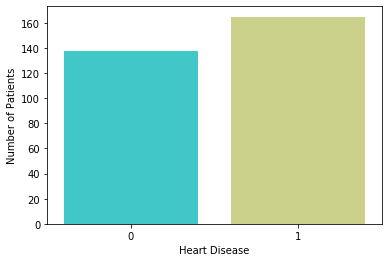

In [12]:
# Need to identify heart_des = '1'  + 'out of' + number of total (use len) + which is + 
#percentage calculation * 100 + % of the total sample.
    # 1 equals 'male'

print('')  #placing print statement before plotted graph
print('The number of patients suffering from heart disease is:', df_heart.heart_des.value_counts()[1],'out of',
      len(df_heart.heart_des),'which is',np.round((df_heart.heart_des.value_counts()[1]/len(df_heart.heart_des))*100,decimals=2),
      '% of the total sample.')
print('')
sns.countplot(df_heart.heart_des,palette='rainbow')
plt.xlabel('Heart Disease')
plt.ylabel('Number of Patients')
plt.show()

### NOTE: We see that males experience more heart disease.

## Q2) What's the gender breakdown? Plot figure.

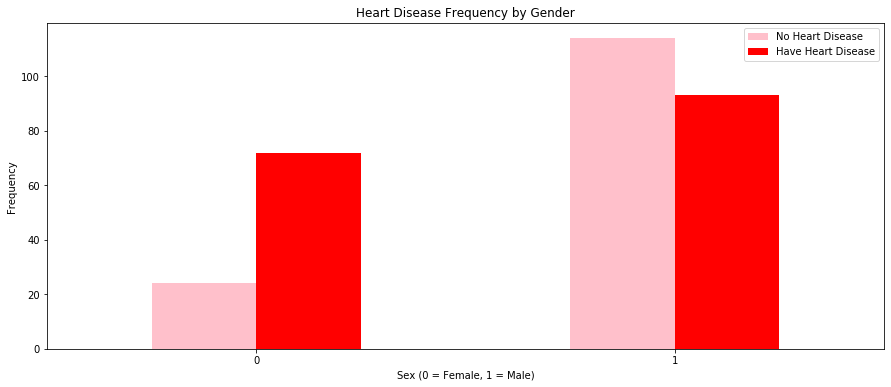

In [13]:
# Use croasstab to show Gender-wise  by'heart_des': Diseased and No-Disease population
pd.crosstab(df_heart.sex,df_heart.heart_des).plot(kind="bar",figsize=(15,6),color=['pink','red' ])
plt.title('Heart Disease Frequency by Gender')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["No Heart Disease", "Have Heart Disease"])
plt.ylabel('Frequency')
plt.show()

### Q3) Create a visual representation of the frequency distribution of the thalach variable and find the heart rate and heart disease relation? Run various statistical tests to provide a conclusion.

In [14]:
# Obesrve the column 'thalach', which is 'max_hr'
df_heart['max_hr']

0      150
1      187
2      172
3      178
4      163
      ... 
298    123
299    132
300    141
301    115
302    174
Name: max_hr, Length: 303, dtype: int64

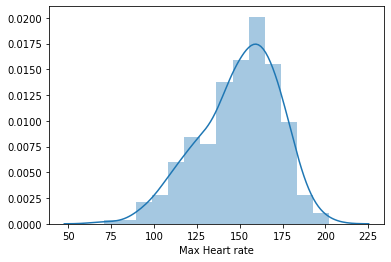

In [15]:
# heart rate = max_hr;  heart disease = heart_des 
sns.distplot(df_heart.max_hr)
plt.xlabel('Max Heart rate')
plt.show()

### NOTE: We can see a normal cuve-like shape. 

## Test hypothesis of:
NULL: 𝐻0:𝜇𝐻𝑒𝑎𝑟𝑡 𝑅𝑎𝑡𝑒 𝑂𝑓 𝐻𝑒𝑎𝑟𝑡𝐷𝑖𝑠𝑒𝑎𝑠𝑒 =𝜇 𝐻𝑒𝑎𝑟𝑡 𝑅𝑎𝑡𝑒 𝑂𝑓 𝑁𝑜
 𝐻𝑒𝑎𝑟𝑡𝐷𝑖𝑠𝑒𝑎𝑠𝑒 ( NO significant difference between the two groups.)
𝐻0:𝜇𝐻𝑒𝑎𝑟𝑡𝑅𝑎𝑡𝑒𝑂𝑓𝐻𝑒𝑎𝑟𝑡𝐷𝑖𝑠𝑒𝑎𝑠𝑒!=𝜇𝐻𝑒𝑎𝑟𝑡𝑅𝑎𝑡𝑒𝑂𝑓𝑁𝑜𝐻𝑒𝑎𝑟𝑡𝐷𝑖𝑠𝑒𝑎𝑠𝑒 

### Note: Mann–Whitney U test 
Also called the Mann–Whitney–Wilcoxon (MWW), Wilcoxon rank-sum test, or Wilcoxon–Mann–Whitney test) is a nonparametric test of the null hypothesis that, for randomly selected values X and Y from two populations, the probability of X being greater than Y is equal to the probability of Y being greater than X.

1) All the observations from both groups are independent of each other,
2) The responses are ordinal (i.e., one can at least say, of any two observations, which is the greater),
3) Null hypothesis H0: the distributions of both populations are equal
4) Alternative hypothesis H1: the distributions are not equal.


In [16]:
#Import statistics libraries
import scipy.stats as stats
import statsmodels as sm
import warnings

warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

In [17]:
t,p=stats.shapiro(df_heart.max_hr)
print('Since the p-value,',np.round(p,decimals=4),
      'is less than 0.05, we reject the Null Hypothesis.''This implies data deviation from being normal.')


Since the p-value, 0.0001 is less than 0.05, we reject the Null Hypothesis.This implies data deviation from being normal.


In [18]:
print('The data is left-skewed with a Kurtosis of:',np.round(df_heart.max_hr.kurtosis(),decimals=4))

The data is left-skewed with a Kurtosis of: -0.062


In [19]:
print("The pearson's correlation between heart desease and max heart rate is", np.round(df_heart.heart_des.corr(other=df_heart.max_hr),decimals=4))


The pearson's correlation between heart desease and max heart rate is 0.4217


In [20]:
#'heart_des' == 0 means no disease
group1 = df_heart[df_heart.heart_des==0]
group2 = df_heart[df_heart.heart_des==1]
t1,p1=stats.shapiro(group1.max_hr)
t2,p2=stats.shapiro(group2.max_hr)
print('The p-value for shapiro test of group 1 :',np.round(p1,decimals=4))
print('The p-value for shapiro test of group 2 :',np.round(p2,decimals=4))

The p-value for shapiro test of group 1 : 0.4253
The p-value for shapiro test of group 2 : 0.0004


### Q4) Find correlation matrix for all the variables with target. 
Find Mean, Min & Max of age and plot its distribution.

In [21]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [22]:
df.groupby('sex').aggregate(np.mean)

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
sex,,,,,,,,,,,,,
0,55.677083,1.041667,133.083333,261.302083,0.12500,0.572917,151.125000,0.229167,0.876042,1.427083,0.552083,2.125000,0.750000
1,53.758454,0.932367,130.946860,239.289855,0.15942,0.507246,148.961353,0.371981,1.115459,1.386473,0.811594,2.400966,0.449275


In [23]:
df.groupby('sex').aggregate(np.median)

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
sex,,,,,,,,,,,,,
0,57,1,131,253,0,1,157,0,0.6,1,0,2,1
1,54,0,130,235,0,1,151,0,0.8,1,0,2,0


In [24]:
df['age']

0      63
1      37
2      41
3      56
4      57
       ..
298    57
299    45
300    68
301    57
302    57
Name: age, Length: 303, dtype: int64

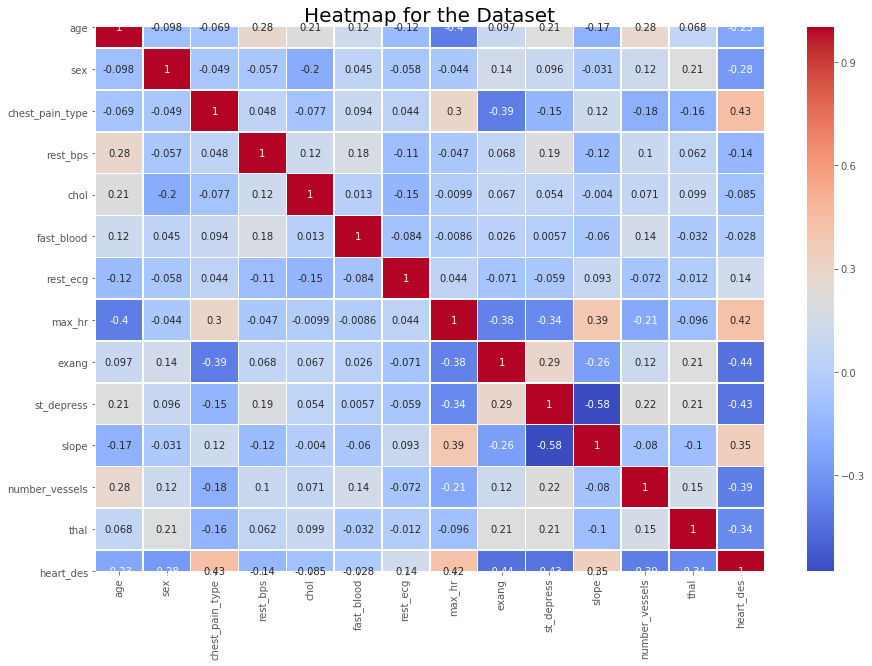

In [25]:
# Create a heat map across all variables shown in .corr

plt.rcParams['figure.figsize'] = (15, 10)
plt.style.use('ggplot')

sns.heatmap(df_heart.corr(), annot = True, cmap = 'coolwarm', linewidths=0.5)
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()

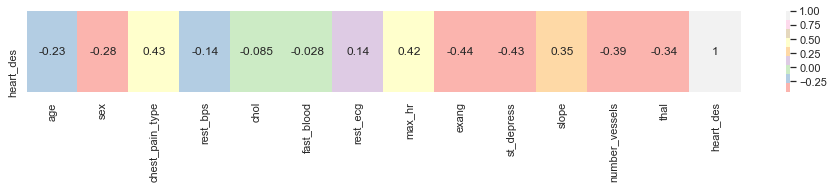

In [26]:
# Correlation with only target variable of 'heart_des'
sns.set(rc={'figure.figsize':(16,1.5)})
sns.heatmap(pd.DataFrame(pd.DataFrame(df_heart.corr()).heart_des).T,annot=True, cmap='Pastel1')#purple')
plt.show()

### Find Mean, Minimum and Maximum of 'age' and plot distribution

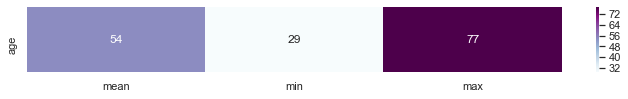

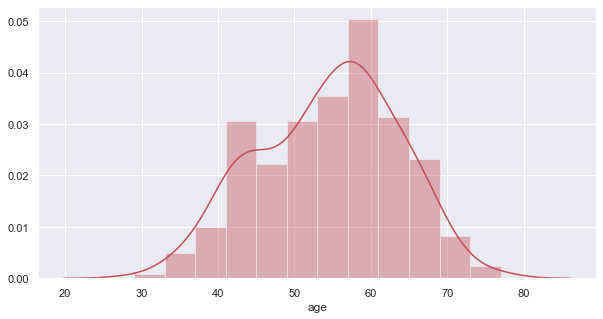

In [27]:
#Use .describe method for 'age' variable

sns.set(rc={'figure.figsize':(12,1.2)})
sns.heatmap((pd.DataFrame(df_heart.age.describe()).T)[['mean', 'min', 'max']], annot=True,  cmap='BuPu')
plt.show()
print('')
sns.set(rc={'figure.figsize':(10,5)})
sns.distplot(df.age, color='r')
plt.show()

### Q5) Age and its relation to heart disease. Are young people more prone to heart disease?


In [28]:
print("The pearson's correlation between heart disease and age is", np.round(df_heart.heart_des.corr(other=df_heart.age),decimals=4))

The pearson's correlation between heart disease and age is -0.2254


### Observation: 
Age is negatively correlated with heart disease at -0.225; so as one increase in age, the chance for heart disease decreases. Odd.

#### Test Hypothesis
Run a T-test to test hypothesis test of mean age 
group 1: patients with 
group 2: patients without heart disease

𝐻0:𝜇𝐴𝑔𝑒𝑂𝑓𝐻𝑒𝑎𝑟𝑡𝑑𝑖𝑠𝑒𝑎𝑠𝑒=𝜇𝐴𝑔𝑒𝑂𝑓𝑁𝑜𝐻𝑒𝑎𝑟𝑡𝑑𝑖𝑠𝑒𝑎𝑠𝑒 
𝐻0:𝜇𝐴𝑔𝑒𝑂𝑓𝐻𝑒𝑎𝑟𝑡𝑑𝑖𝑠𝑒𝑎𝑠𝑒!=𝜇𝐴𝑔𝑒𝑂𝑓𝑁𝑜𝐻𝑒𝑎𝑟𝑡𝑑𝑖𝑠𝑒𝑎𝑠𝑒

In [29]:
#Form two groups and testing for normality of both the groups.
g1 = df_heart[df_heart.heart_des ==0]
g2 = df_heart[df_heart.heart_des ==1]
t1,p1 = stats.shapiro(g1.age)
t2,p2 = stats.shapiro(g2.age)
print('The p-value for shapiro test of group 1 :',np.round(p1,decimals=4))
print('The p-value for shapiro test of group 1 :',np.round(p2,decimals=4))

The p-value for shapiro test of group 1 : 0.0029
The p-value for shapiro test of group 1 : 0.1211


### Observation:
Above we see that only the first group the p-value is less than 0.05, so we reject the null and state that One of the groups are NOT normal.

Next we perform Mannwhitneyu Test to find if the mean of both the groups are the same, or NOT.

#### Mannwhitneyu Test

In [30]:
# Check means of age in g1 and g2
t,p=stats.mannwhitneyu(g1.age,g2.age)
print('The p-value for Mannwhitneyu test :',np.round(p,decimals=10))

The p-value for Mannwhitneyu test : 1.71926e-05


### Observation:
Since the p-value is less than 0.05, we reject the null and state that The mean age of both the groups is NOT the same.

Now we perform post-hoc analysis to analyse the mean age of both the groups

In [ ]:
#df_age_target is the mean age across groups
df_age_target = df_heart[df_heart.heart_des == 1]
                        #What's this?
df_age_target = df_age_target[['age','heart_des']]


df_age_target_0 = df_heart[df_heart.heart_des == 0]
df_age_target_0 = df_age_target_0[['age','heart_des']]

fig, ax = plt.subplots()
sns.distplot(df_age_target_0.age, hist = False, kde = True, label='Healthy Heart ')
sns.distplot(df_age_target.age, hist = False, kde = True, label='Heart Disease')

ax.set_xlim(20,100)
plt.show()

In [31]:
import numpy as np
print('The mean age of patients without a heart disease:',np.round(df.age.mean(),decimals=2))
print('The mean age of patients with a heart disease:',np.round(df.age.mean(),decimals=2))

The mean age of patients without a heart disease: 54.37
The mean age of patients with a heart disease: 54.37


#### Run a Regression Model and interpret coefficients

In [32]:
import statsmodels.api as sm
from statsmodels.api import add_constant

X = df_heart.age
Y =df_heart.heart_des
XC =sm.add_constant(X)
result =sm.Logit(Y,XC).fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.663138
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              heart_des   No. Observations:                  303
Model:                          Logit   Df Residuals:                      301
Method:                           MLE   Df Model:                            1
Date:                Sat, 10 Oct 2020   Pseudo R-squ.:                 0.03778
Time:                        11:59:58   Log-Likelihood:                -200.93
converged:                       True   LL-Null:                       -208.82
Covariance Type:            nonrobust   LLR p-value:                 7.128e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0362      0.756      4.014      0.000       1.554       4.519
age           -0.0524      0.

### Observation: 
We have 303 observations. Our Dependent variable in this regression model is "heart disease" or 'heart_des'. We see that with a 1 unit increase in age, we see a 5.2 decrease in probablity in our dependent variable of heart disease. 

#### Note: 
Age from minimum age (29),there is a 5.2 % decrease in probablity of a heart disease. Hence, younger population groups say (age group 40-50) are slightly more prone to heart diseases than it's elder group (age group say 50-60)

### Q6) Plot chest pain type pie chart.

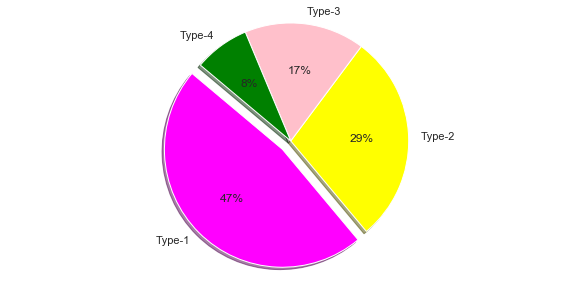

In [33]:
#Use variable 'chest_pain_type'
labels = 'Type-1', 'Type-2', 'Type-3', 'Type-4'
counts = list(df_heart.chest_pain_type.value_counts().values)
colors = ['magenta', 'yellow', 'pink', 'green']
explode = (0.1, 0, 0, 0)  # explode 1st slice
plt.pie(counts, explode=explode, labels=labels, colors=colors,
autopct='%1.0f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

#### Note: Type 1 is the largest group suffering from heart disease. 

### Q7) What is the max heart rate achieved in non-heart disease patients? 

In [34]:
#Non heart disease is 'heart_des' == 0

print('The max heart rate achieved in non heart disease patients is :',max(df_heart[df_heart.heart_des==0].max_hr),'bpm')

The max heart rate achieved in non heart disease patients is : 195 bpm


## Part B) Machine Learning Model:
Test different Machine models to test which model has higher accuracy to choose from?

After choosing the best model, try to predict based on user based inputs and let the best model predict whether the user can have heart disease or not.

In [35]:
#Creating data frame without target variable
df_heart.head(5)

,age,sex,chest_pain_type,rest_bps,chol,fast_blood,rest_ecg,max_hr,exang,st_depress,slope,number_vessels,thal,heart_des
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [38]:
y_target = df_heart['heart_des']
var_data = df_heart.drop('heart_des', axis = 1)
var_data

,age,sex,chest_pain_type,rest_bps,chol,fast_blood,rest_ecg,max_hr,exang,st_depress,slope,number_vessels,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [39]:
# Categorical variables need : ONE HOT ENCODING 
var_data = pd.get_dummies(var_data, drop_first=True)
print(var_data.head())

   age  sex  chest_pain_type  rest_bps  chol  fast_blood  rest_ecg  max_hr  \
0   63    1                3       145   233           1         0     150   
1   37    1                2       130   250           0         1     187   
2   41    0                1       130   204           0         0     172   
3   56    1                1       120   236           0         1     178   
4   57    0                0       120   354           0         1     163   

   exang  st_depress  slope  number_vessels  thal  
0      0         2.3      0               0     1  
1      0         3.5      0               0     2  
2      0         1.4      2               0     2  
3      0         0.8      2               0     2  
4      1         0.6      2               0     2  


### Train and Test datasets

In [40]:
#var_data = variables as dummies: sex, fast_blood, rest_ecg, number_vessels, thal
    #Split data into 75% train and 25% test

from sklearn.model_selection import train_test_split

x = var_data
y = y_target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# getting the shapes of each train and test
print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (227, 13)
Shape of x_test : (76, 13)
Shape of y_train : (227,)
Shape of y_test : (76,)


#### Note: No y value data in y_train, or y_test

### Model 1: Support Vector Model

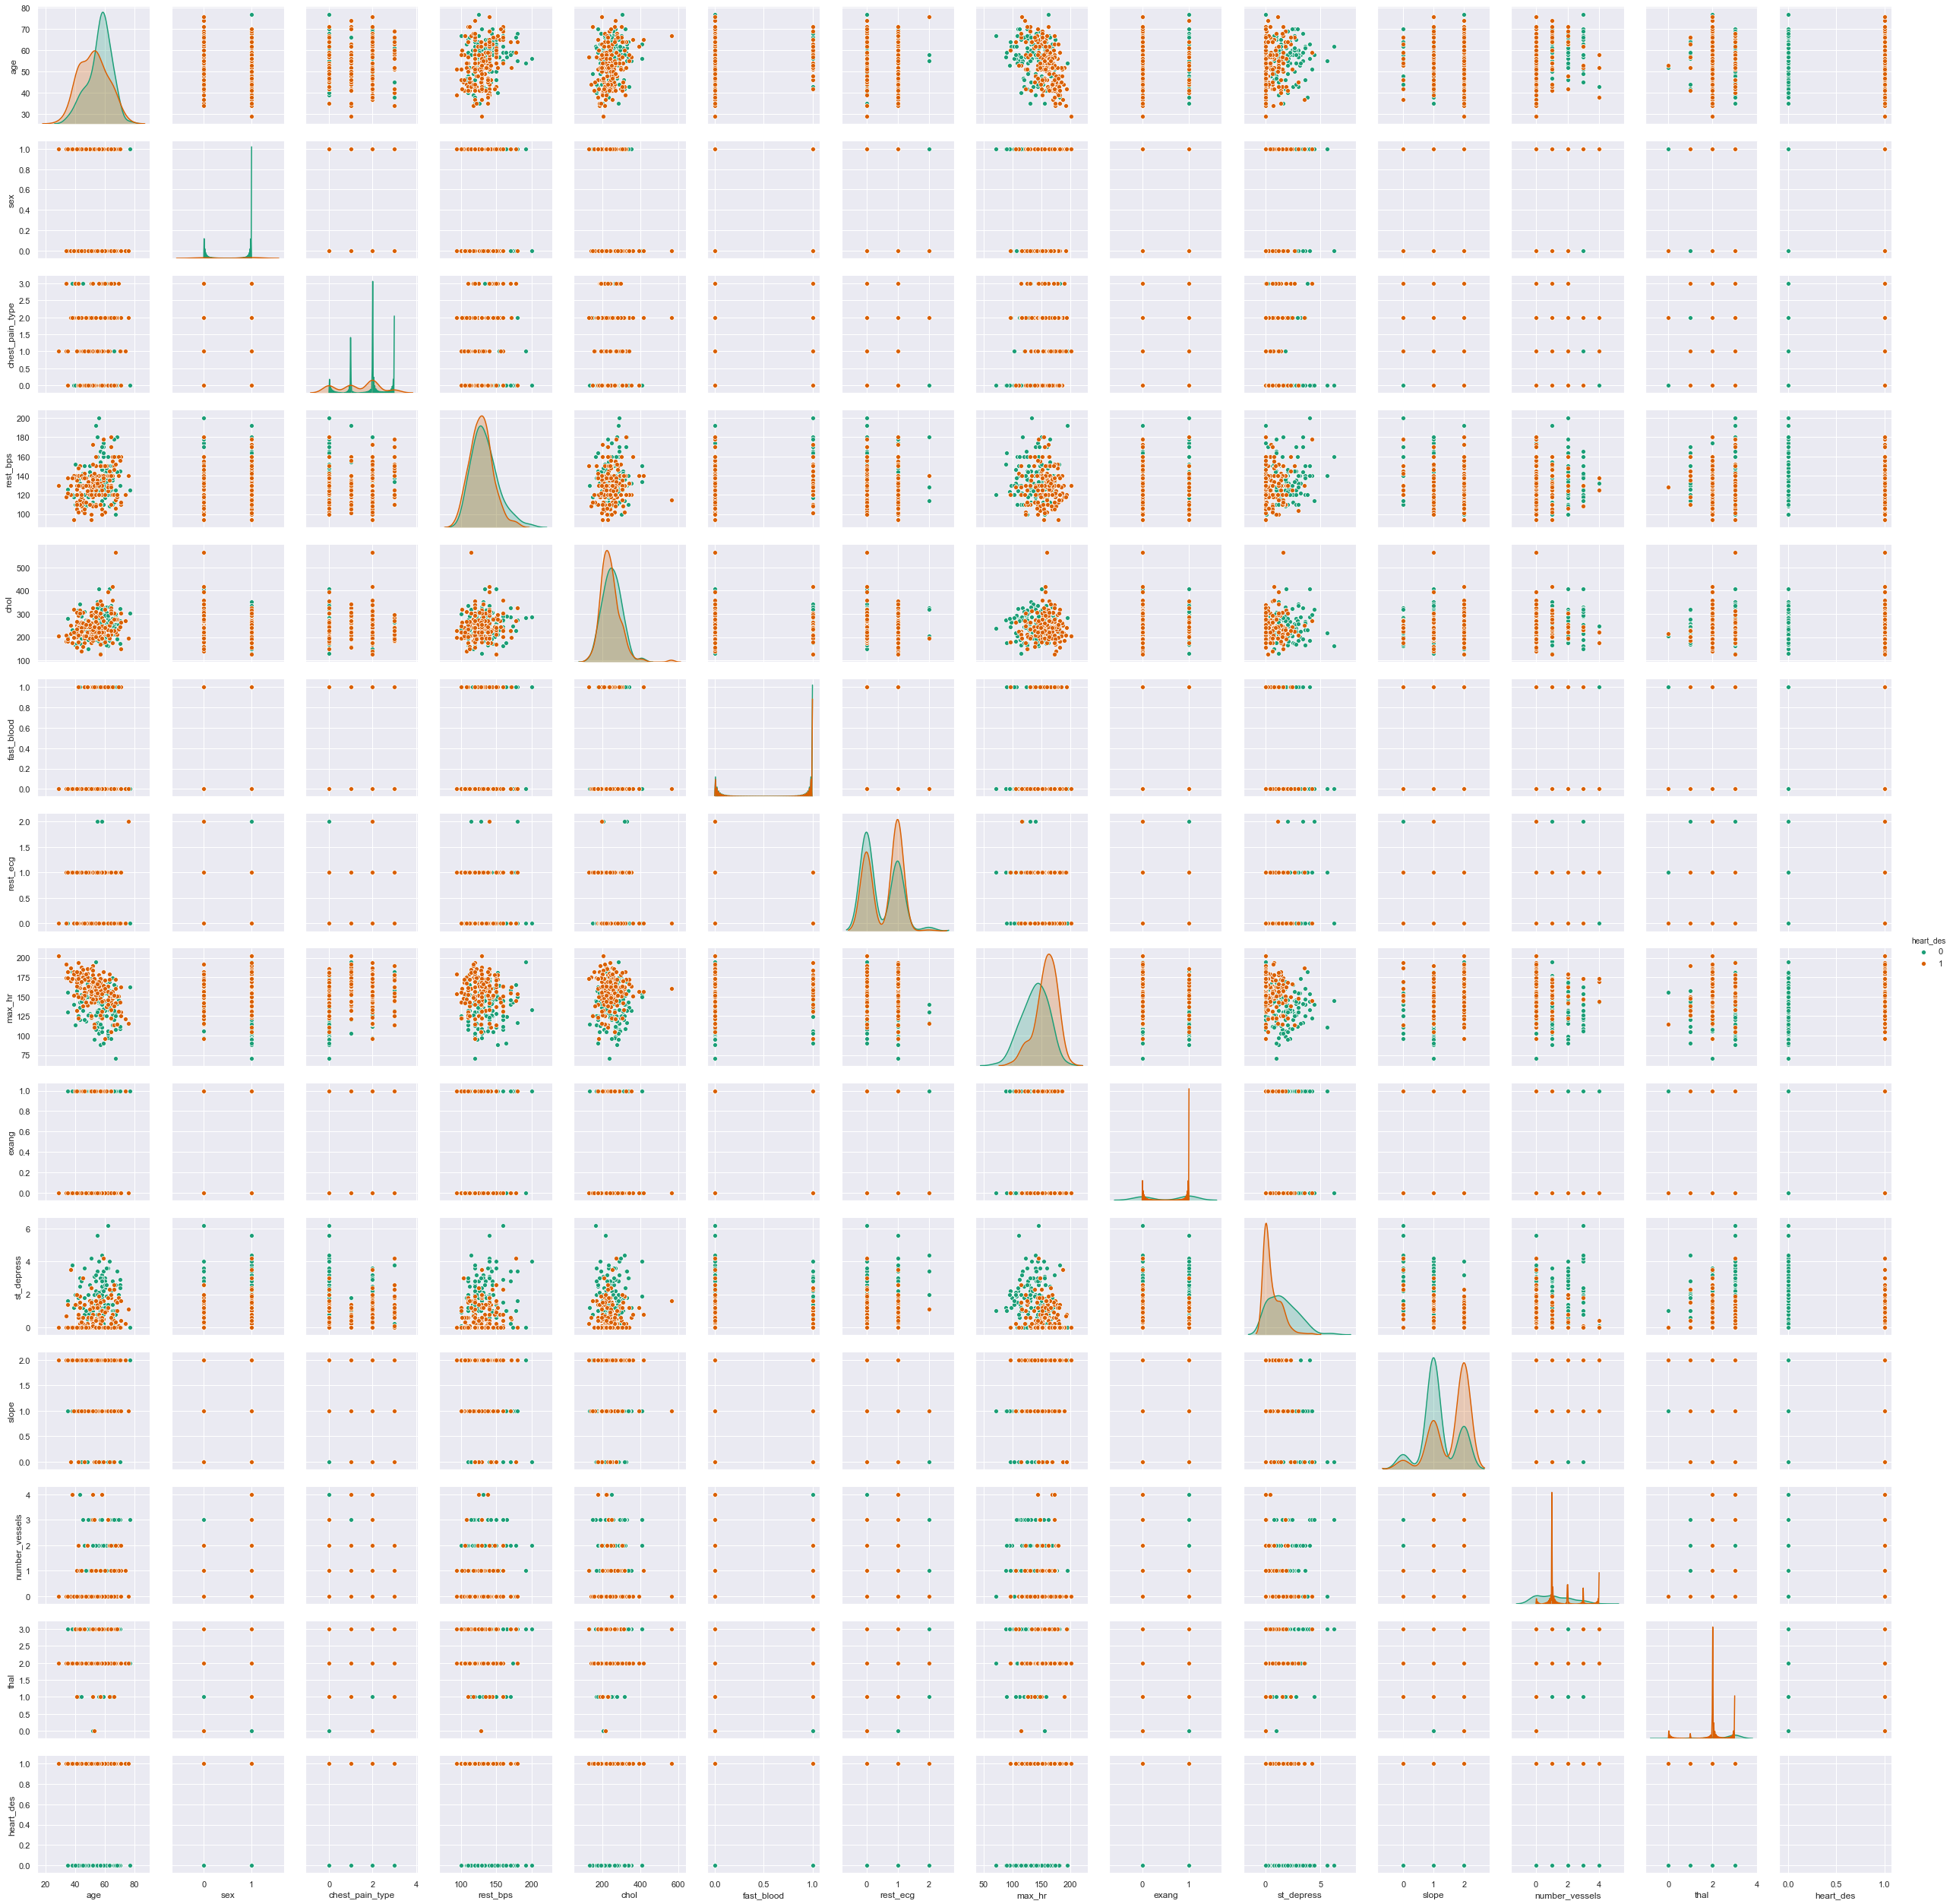

In [41]:
# Before we implement the SVM - we want to understand if we can find any patterns
#between target variable and other features 

sns.pairplot(df_heart,hue='heart_des',palette='Dark2')

import matplotlib.pyplot as plt
plt.show()

In [42]:
#Use x_train, y_train set

from sklearn.svm import SVC

svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train, y_train)


SVC(kernel='linear')

In [43]:
x_train

,age,sex,chest_pain_type,rest_bps,chol,fast_blood,rest_ecg,max_hr,exang,st_depress,slope,number_vessels,thal
173,58,1,2,132,224,0,0,173,0,3.2,2,2,3
261,52,1,0,112,230,0,1,160,0,0.0,2,1,2
37,54,1,2,150,232,0,0,165,0,1.6,2,0,3
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3
192,54,1,0,120,188,0,1,113,0,1.4,1,1,3
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3
47,47,1,2,138,257,0,0,156,0,0.0,2,0,2


In [44]:
y_train

173    0
261    0
37     1
101    1
166    0
      ..
251    0
192    0
117    1
47     1
172    0
Name: heart_des, Length: 227, dtype: int64

In [45]:
y_pred = svclassifier.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1])

In [46]:
#Review Recall and Precision
    #Need Confusion Matrix to A confusion matrix is a table that is often used to describe the performance 
    #of our classification model, SVM, on a set of test data for which the true values are known

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[24  9]
 [ 3 40]]
              precision    recall  f1-score   support

           0       0.89      0.73      0.80        33
           1       0.82      0.93      0.87        43

    accuracy                           0.84        76
   macro avg       0.85      0.83      0.83        76
weighted avg       0.85      0.84      0.84        76



In [47]:
# LOok up .score for accuracy

#### Note: The F-score, also called the F1-score, is a measure of a model's accuracy on a dataset. The F-score is a way of combining the precision and recall of the model, and it is defined as the harmonic mean of the model's precision and recall.

In our SVM model, we have an F-1 score of 84%.

In [48]:
# Let's implement Gridsearch to see if model improves
from sklearn.model_selection import learning_curve,GridSearchCV
param_grid = {'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001]}
param_grid

{'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}

In [49]:
grid = GridSearchCV(SVC(),param_grid, verbose=2)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............................... C=0.1, gamma=0.001, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    1.7s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

In [50]:
grid_predictions = grid.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[24  9]
 [ 3 40]]
              precision    recall  f1-score   support

           0       0.89      0.73      0.80        33
           1       0.82      0.93      0.87        43

    accuracy                           0.84        76
   macro avg       0.85      0.83      0.83        76
weighted avg       0.85      0.84      0.84        76



### Note: The resums between x_train and x_test are the same. The Model remained the same and not much change after GridSearch hence we can keep any of them

## Model 2: Decision Tree Classifier

In [51]:
from sklearn import tree, metrics

dtree_heart = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
dtree_heart.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [52]:
# Use the dtree_heart model to make predictions with the test data 

y_pred = dtree_heart.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0])

In [53]:
# how did our model perform?
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 18
Accuracy: 0.76


## Visualize with Graphiz

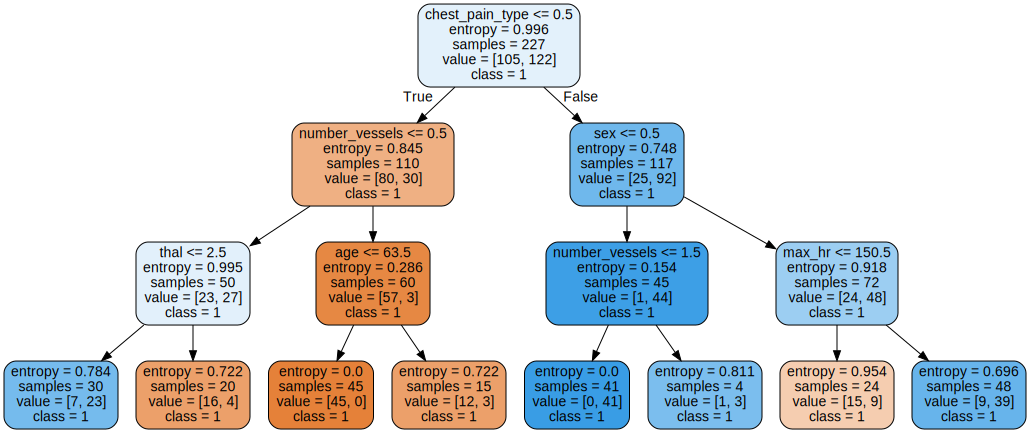

In [54]:
import graphviz

# Feature names will be all x columns 
feature_names = x.columns

# Class names will be our target variable
y_train_str = y_train.astype('str')

dot_data = tree.export_graphviz(dtree_heart, out_file=None, filled=True, rounded=True,
                                feature_names=feature_names,  
                                class_names=y_train_str)
graph = graphviz.Source(dot_data)  
graph

## Model 3: Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = RandomForestClassifier(n_estimators = 50, max_depth = 6,random_state=123)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
y_predict


array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1])

In [56]:
y_pred_quant = model.predict_proba(x_test)[:, 1]
y_pred_quant

array([0.05723068, 0.55670025, 0.61588118, 0.01017866, 0.17725402,
       0.45089506, 0.2816275 , 0.11832764, 0.04      , 0.10268775,
       0.55655437, 0.92846768, 0.06604336, 0.94642578, 0.91774751,
       0.58521923, 0.23739316, 0.76778336, 0.0910358 , 0.62142416,
       0.82568991, 0.2821385 , 0.3256338 , 0.2695873 , 0.82206707,
       0.47455628, 0.25462368, 0.48066936, 0.89239975, 0.78479379,
       0.59242194, 0.17090909, 0.96653274, 0.69976128, 0.98791311,
       0.53560987, 0.15769542, 0.93123897, 0.08092893, 0.21111111,
       0.63693694, 0.63145763, 0.84797384, 0.09544532, 0.4489599 ,
       0.75995109, 0.8653955 , 0.43777097, 0.15704762, 0.8144405 ,
       0.94021491, 0.5939265 , 0.91434397, 0.74823694, 0.9778664 ,
       0.17590023, 0.79504874, 0.76854219, 0.84565959, 0.94301676,
       0.7472673 , 0.98035899, 0.76013384, 0.82209649, 0.58634358,
       0.64906112, 0.67798427, 0.1207265 , 0.67716529, 0.75197854,
       0.43811896, 0.96005957, 0.80179504, 0.04377866, 0.13466

In [57]:
y_pred = model.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1])

In [58]:
# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.9779735682819384
Testing Accuracy : 0.8552631578947368


### Note: Perhaps our Random Forest Classifier model is overfitting since our accuracy is higher by 12 points 
### when we compare the train and test data results.

              precision    recall  f1-score   support

           0       0.87      0.79      0.83        33
           1       0.85      0.91      0.88        43

    accuracy                           0.86        76
   macro avg       0.86      0.85      0.85        76
weighted avg       0.86      0.86      0.85        76



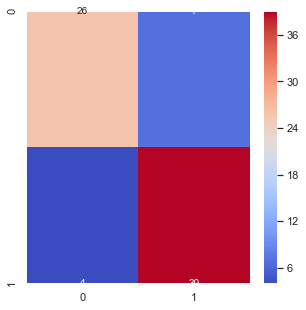

In [59]:
# cofusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':10}, cmap = 'coolwarm')

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

### Feature Importance

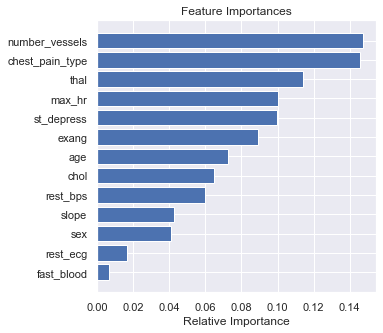

In [60]:
#Let's look at feature importance
features = x.columns

importances = model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Conclusion: 
Decision Tree Classifier model shows a 76% accuracy while SVM shows an 84% score (F-1 score) and Random Forest Model shows an accuracy score of 86%. In conclusion, Random Forest Model shows the highest accuracy.


## Part C) Deployment of Model
User form using Jupyter Notebook Widgets

Create a user-based form within the Jupyter notebook (documentation) to receive input from the user. Form should include all parameters needed to predict heart disease probability.

Code form to calculate results when user submits form. Test to see if right answer is provided.

Advanced Project
Python with Flask

Flask is a simple-framework library to model and predict in real-time via the cloud.

Create a simple user input to determine to allow users to determine if they heart disease.

### Visualization
#### *plotly

#### *Google visualization

#### *Shiny

In [61]:
from ipywidgets import widgets

In [62]:
from sqlalchemy import create_engine
#import sqlalchemy
#print (sqlalchemy.__version__)

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
heart_df = pd.read_sql_query('select * from heartdisease',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [63]:
# Define the features and the outcome
X = heart_df.iloc[:, :13]
y = heart_df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

In [64]:
print(X)

        0    1    2      3      4    5    6      7    8    9   10   11   12
0    63.0  1.0  1.0  145.0  233.0  1.0  2.0  150.0  0.0  2.3  3.0  0.0  6.0
1    67.0  1.0  4.0  160.0  286.0  0.0  2.0  108.0  1.0  1.5  2.0  3.0  3.0
2    67.0  1.0  4.0  120.0  229.0  0.0  2.0  129.0  1.0  2.6  2.0  2.0  7.0
3    37.0  1.0  3.0  130.0  250.0  0.0  0.0  187.0  0.0  3.5  3.0  0.0  3.0
4    41.0  0.0  2.0  130.0  204.0  0.0  2.0  172.0  0.0  1.4  1.0  0.0  3.0
..    ...  ...  ...    ...    ...  ...  ...    ...  ...  ...  ...  ...  ...
298  45.0  1.0  1.0  110.0  264.0  0.0  0.0  132.0  0.0  1.2  2.0  0.0  7.0
299  68.0  1.0  4.0  144.0  193.0  1.0  0.0  141.0  0.0  3.4  2.0  2.0  7.0
300  57.0  1.0  4.0  130.0  131.0  0.0  0.0  115.0  1.0  1.2  2.0  1.0  7.0
301  57.0  0.0  2.0  130.0  236.0  0.0  2.0  174.0  0.0  0.0  2.0  1.0  3.0
302  38.0  1.0  3.0  138.0  175.0  0.0  0.0  173.0  0.0  0.0  1.0    0  3.0

[303 rows x 13 columns]


In [65]:
print(heart_df)

        0    1    2      3      4    5    6      7    8    9   10   11   12  \
0    63.0  1.0  1.0  145.0  233.0  1.0  2.0  150.0  0.0  2.3  3.0  0.0  6.0   
1    67.0  1.0  4.0  160.0  286.0  0.0  2.0  108.0  1.0  1.5  2.0  3.0  3.0   
2    67.0  1.0  4.0  120.0  229.0  0.0  2.0  129.0  1.0  2.6  2.0  2.0  7.0   
3    37.0  1.0  3.0  130.0  250.0  0.0  0.0  187.0  0.0  3.5  3.0  0.0  3.0   
4    41.0  0.0  2.0  130.0  204.0  0.0  2.0  172.0  0.0  1.4  1.0  0.0  3.0   
..    ...  ...  ...    ...    ...  ...  ...    ...  ...  ...  ...  ...  ...   
298  45.0  1.0  1.0  110.0  264.0  0.0  0.0  132.0  0.0  1.2  2.0  0.0  7.0   
299  68.0  1.0  4.0  144.0  193.0  1.0  0.0  141.0  0.0  3.4  2.0  2.0  7.0   
300  57.0  1.0  4.0  130.0  131.0  0.0  0.0  115.0  1.0  1.2  2.0  1.0  7.0   
301  57.0  0.0  2.0  130.0  236.0  0.0  2.0  174.0  0.0  0.0  2.0  1.0  3.0   
302  38.0  1.0  3.0  138.0  175.0  0.0  0.0  173.0  0.0  0.0  1.0    ?  3.0   

     13  
0     0  
1     2  
2     1  
3     0  
4

### USER BASED INPUT to Predict if the user can have heart disease

In [66]:
# Fill in Parameters
User_Age =   37 #@param {type:"integer"}

Male =  False #@param {type:"boolean"}         
Female = True #@param {type:"boolean"}

if Male:
  sex = 1
else:
  sex = 0 #female

Chest_pain_type = 1  #@param {type:"slider", min:0, max:3, step:1}
resting_bp = 127     #@param {type:"slider", min:94, max:200, step:1}
Serum_cholestoral = 329 #@param {type:"slider", min:125, max:500, step:1}

# fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
fasting_blood_sugar = 0 #@param {type:"slider", min:0, max:1, step:1}

#restecg: resting electrocardiographic results
#-- Value 0: normal # Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
#-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

resting_electrocardiographic = 1 #@param {type:"slider", min:0, max:2, step:1}
max_heart_rate = 162 #@param {type:"slider", min:70, max:210, step:1}

#exercise induced angina (1 = yes; 0 = no) 
exercise_angina =  0 #@param {type:"slider", min:0, max:1, step:1}

# oldpeak = ST depression induced by exercise relative to rest 
oldpeak = 1.6 #@param {type:"slider", min:0, max:6.5, step:0.1}

#slope: the slope of the peak exercise ST segment  #Value 1: upsloping   # Value 2: flat  #Value 3: downsloping 
slope =  1 #@param {type:"slider", min:1, max:3, step:1}

#ca: number of major vessels (0-3) colored by flourosopy 
no_major_vessels =  1 #@param {type:"slider", min:0, max:4, step:1}

#thal: 0 = normal; 1 = fixed defect; 2 = reversable defect, 3 = permanent defect
thal =  3 #@param {type:"slider", min:0, max:3, step:1}


In [69]:

from IPython.display import display

button = widgets.Button(description="Click for Results!")
output = widgets.Output()

def on_button_clicked(b):
  # Display the message within the output widget.
  with output:
    new_input = [[User_Age,sex,Chest_pain_type,resting_bp,Serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic,max_heart_rate,exercise_angina,oldpeak,slope,no_major_vessels,thal]]
    #print(new_input)
    #new_output = model.predict(new_input)
    new_output = model.predict(new_input)
    if new_output == 0:
      print("You have Healthy Heart :) ")
    else:
      print("Likely to have Heart disease :( ")
    #print(new_output)
    #print("Button clicked.")

button.on_click(on_button_clicked)
display(button, output)

Button(description='Click for Results!', style=ButtonStyle())

Output()

In [70]:
# WE can achieve same results by passing a list with the following values
new_input = [[User_Age, sex, Chest_pain_type, resting_bp, Serum_cholestoral, 
              fasting_blood_sugar,resting_electrocardiographic,
              max_heart_rate, exercise_angina, oldpeak, slope, no_major_vessels,thal]]
print(new_input)
new_output = model.predict(new_input)
print(new_output)

[[37, 0, 1, 127, 329, 0, 1, 162, 0, 1.6, 1, 1, 3]]
[1]


### Use Flask: User Interface Results
updating in real time

In [71]:
from flask import Flask
import threading

app = Flask(__name__)

@app.route("/")
def hello():
    new_input = [[User_Age,sex,Chest_pain_type,resting_bp,Serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic,max_heart_rate,exercise_angina,oldpeak,slope,no_major_vessels,thal]]
    new_output = model.predict(new_input)
    new_output = new_output.astype(str)
    if new_output == '1':
      return "NOT SO GOOD!"
    else:
      return "GOOD FOR NOW"
    
threading.Thread(target=app.run, kwargs={'host':'0.0.0.0','port':6060}).start()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://0.0.0.0:6060/ (Press CTRL+C to quit)


In [72]:
import IPython.display

def display(port, height):
    shell = """
        (async () => {
            const url = await google.colab.kernel.proxyPort(%PORT%, {"cache": true});
            const iframe = document.createElement('iframe');
            iframe.src = url;
            iframe.setAttribute('width', '100%');
            iframe.setAttribute('height', '%HEIGHT%');
            iframe.setAttribute('frameborder', 0);
            document.body.appendChild(iframe);
        })();
    """
    replacements = [
        ("%PORT%", "%d" % port),
        ("%HEIGHT%", "%d" % height),
    ]
    for (k, v) in replacements:
        shell = shell.replace(k, v)

    script = IPython.display.Javascript(shell)
    IPython.display.display(script)

display(6060, 100)

<IPython.core.display.Javascript object>

# SUMMARY: 
We CREATED A User-based form on server using the Flask environment to pull real-time data so that the user can can check for heart disease based on the algorithm modeled above that we tested and selected. 

## Revisit Data Munging: Drop Missing

In [ ]:
# Sample data to play with and clean.
data = {
    'age': [27, 50, 34, None, None, None],
    'gender': ['f', 'f', 'f', 'm', 'm', None],
    'height' : [64, None, 71, 66, 68, None],
    'weight' : [140, None, 130, 110, 160, None],
}
df = pd.DataFrame(data)

# Full dataset.
print(df)

# Drop all rows that have any missing values in any column.
print(df.dropna()) 

# Drop only rows where all values are missing.
print(df.dropna(how='all'))

# Drop only rows where more than two values are missing.
print(df.dropna(thresh=2))

# Drop all rows that have any missing values in the 'gender' or 'height' columns.
print(df.dropna(subset=['gender','height']))

# Your turn. Write code below to drop rows where both height and weight
# are missing and print the result.

In [ ]:
# Drop all rows that have any missing values in the 'gender' or 'height' columns.
print(df.dropna(subset=['gender','height']))

# Your turn. Write code below to drop rows where both height and weight
# are missing and print the result.
#df.dropna(subset=[1,2], how='all')
print(df.dropna(subset = ['gender','height'], how = 'all'))